In [1]:
!unzip "/content/drive/MyDrive/Dataset.zip"

Archive:  /content/drive/MyDrive/Dataset.zip
   creating: Training_Dataset/Normal/
  inflating: Training_Dataset/Normal/1.jpg  
  inflating: Training_Dataset/Normal/10 (2).jpg  
  inflating: Training_Dataset/Normal/10.driving-on-country-roads-1.jpg  
  inflating: Training_Dataset/Normal/10.g2vnvw1of2i11.jpg  
  inflating: Training_Dataset/Normal/10.island-road-trip-smooth-roads-road-trip-sunny-day-sky-having-cumulus-nimbus-clouds-along-empty-smooth-black-124987092.jpg  
  inflating: Training_Dataset/Normal/10.jpg  
  inflating: Training_Dataset/Normal/10.This-Is-the-Real-Difference-Between-Streets-Roads-and-Avenues_394392439-TTstudio-1024x684.jpg  
  inflating: Training_Dataset/Normal/100.5b23afff15e9f96fe6738e67.jpg  
  inflating: Training_Dataset/Normal/100.jpg  
  inflating: Training_Dataset/Normal/101.1946---N,-d-,09,-d-,93,-d-,04,-d-,04-driving.jpg  
  inflating: Training_Dataset/Normal/101.jpg  
  inflating: Training_Dataset/Normal/102.jpg  
  inflating: Training_Dataset/Normal/1

In [14]:
import tensorflow #keras-deep learning library library built on top of tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation #dense layer is fully connected layer.
#Dropout is to prevent your model from overfitting.
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [3]:
#initializing the parameters
image_width,image_height=200,200  #height and width of acceptable images to the model
training_data_dir=r"/content/Training_Dataset"

testing_data_dir=r"/content/Testing_Dataset"
epochs=70 #70 times the model will learn from the data.
batch_size=20  #takes 20 samples from the dataset

In [4]:
import tensorflow.keras.backend as k
if k.image_data_format()=="channels_first":
  input_shape=(3,image_width,image_height)
else:
  input_shape=(image_width,image_height,3)

In [5]:
trained_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 rescale=1./255, #rescaling the pixels in range 0-255 to 0-1.
                                 shear_range=0.2, #applies 20% shear strain over image .
                                 zoom_range=0.3, #adjust the zoom in the range of 1-0.3 to 1+0.3.
                                 horizontal_flip=True,vertical_flip=True, #flips the image vertically and horizontally.
                                 rotation_range=360, #rotates the image in range of 0 to 360.
                                 fill_mode='nearest', #after rotating, if the image has whitespaces created then they are filled with the nearest pixels.
                                 width_shift_range=0.2,height_shift_range=0.2, #shifts the image by 20% in horizontal and vertical directions.
                                 brightness_range=[0.4,1.5] #this are the brightness shift values range
                                 )

tested_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255, brightness_range=[0.4,1.5])
trained_generator=trained_datagen.flow_from_directory(training_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical",
                                                  classes=["Normal","Potholes","SpeedBumps"])

validated_generator=tested_datagen.flow_from_directory(testing_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical",
                                                      classes=["Normal","Potholes","SpeedBumps"])

Found 1703 images belonging to 3 classes.
Found 440 images belonging to 3 classes.


In [15]:
model_i2=Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,
    pooling=None,
)
model_i2.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 99, 99, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 99, 99, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [21]:
model_i2.trainable=True
set_trainable=False

for layer in model_i2.layers:
  if layer.name=='block9_sepconv1_act':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in model_i2.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d False
block2_pool False
batch_normalization False
add False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_1 False
block3_pool False
batch_normalization_1 False
add_1 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_2 False
block4_pool False
batch_normalization_2 False
add_2 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn False
add_3 False
bl

In [22]:
# for layers in models1.layers:
#   layers.trainable=False

model_i2.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 99, 99, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 99, 99, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 99, 99, 32)           0         ['block1_conv1_bn[0][0]

In [23]:
#making classification layer to fit our model
from matplotlib.cbook import flatten
from tensorflow.keras import layers, models

flatten_layer=layers.Flatten()
dense_layer1=layers.Dense(50,activation='relu')

dense_layer2=layers.Dense(20,activation='relu')

predictionlayer=layers.Dense(3,activation='softmax')

model_i18=models.Sequential([model_i2,
                         flatten_layer,
                         dense_layer1,
                        Dropout(0.2),
                         dense_layer2,
                         Dropout(0.2),
                         predictionlayer]) #dropout after each dense layer deactivates the 20% nodes of the above layer randomly in each epoch.
model_i18.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 50)                5017650   
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                

In [24]:
from keras.optimizers import SGD


model_i18.compile(
    optimizer='SGD', loss='categorical_crossentropy',metrics='accuracy'
)

In [11]:
from keras.callbacks import ReduceLROnPlateau
reduced_lr= ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=5, min_lr=0.0001)
callback_list=[reduced_lr]

In [26]:
traineed=model_i18.fit(trained_generator,steps_per_epoch=50,epochs=50, validation_data=validated_generator,shuffle=True, callbacks=callback_list)

Epoch 1/50
50/50 [==============================] - 32s 625ms/step - loss: 0.3886 - accuracy: 0.8530 - val_loss: 0.4413 - val_accuracy: 0.8455 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 43s 866ms/step - loss: 0.2670 - accuracy: 0.9070 - val_loss: 0.4633 - val_accuracy: 0.8432 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 31s 621ms/step - loss: 0.2404 - accuracy: 0.9125 - val_loss: 0.3714 - val_accuracy: 0.8523 - lr: 0.0100
Epoch 4/50
50/50 [==============================] - 32s 640ms/step - loss: 0.1960 - accuracy: 0.9330 - val_loss: 0.2303 - val_accuracy: 0.9273 - lr: 0.0100
Epoch 5/50
50/50 [==============================] - 31s 614ms/step - loss: 0.3136 - accuracy: 0.8881 - val_loss: 0.1849 - val_accuracy: 0.9500 - lr: 0.0100
Epoch 6/50
50/50 [==============================] - 35s 695ms/step - loss: 0.1551 - accuracy: 0.9530 - val_loss: 0.2562 - val_accuracy: 0.9205 - lr: 0.0100
Epoch 7/50
50/50 [==============================] - 32s 634ms/st

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


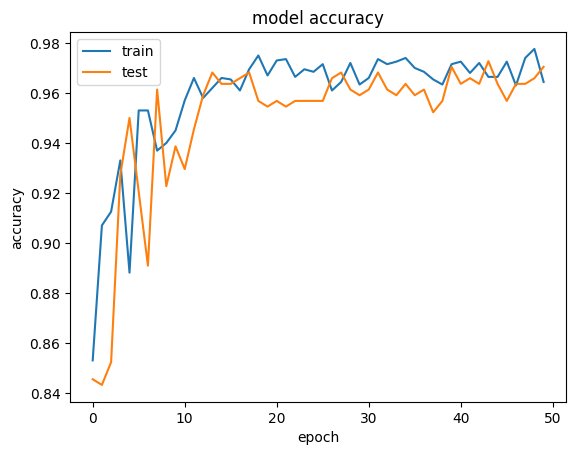

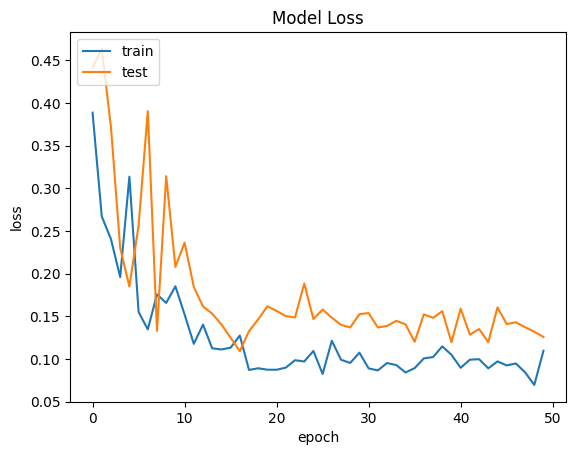

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(traineed.history.keys())
#summarize training for accuracy
plt.plot(traineed.history['accuracy'])
plt.plot(traineed.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()
#summarize training for loss
plt.plot(traineed.history['loss'])
plt.plot(traineed.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()